In [1]:
%run "../../shared/utilz_includez.ipynb"

In [2]:
from scipy.integrate import quad


# 1. Box Plots Vs PDF

50.0 % of the values are within +/- 0.6745 standard deviations of mean
99.3 % of the values are within +/- 2.698 standard deviations of mean


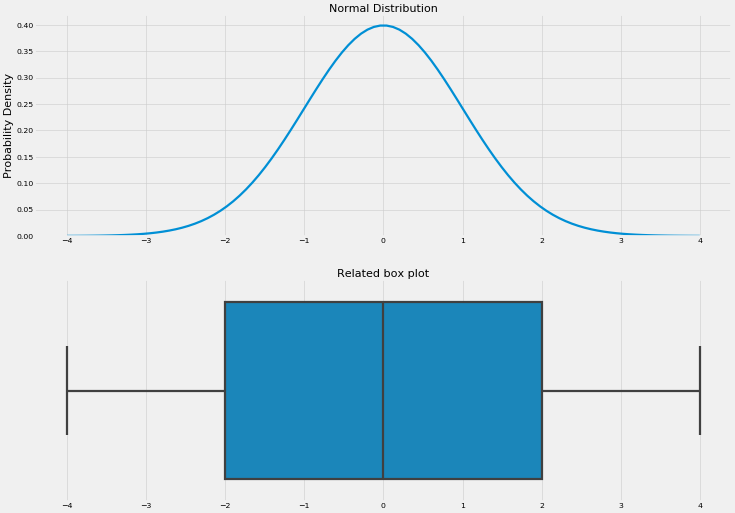

In [10]:
## Plot normal distribution PDF
# pdf = 1/sqrt(2*pi*sig^2) . exp( -1* (x - mu)^2 / (2 sig^2))

def gen_normal_pdf(x, xsig=1, xmu=0):
    c = 1.0 / np.sqrt( 2 * np.pi * xsig**2 )
    return c * np.exp( -1 * (x - xmu)**2 / (2 * xsig**2 ) )

def get_probability(x_0, x_n, fx_pdf=gen_normal_pdf, limit=1000):
    return quad(fx_pdf, x_0, x_n, limit=limit)

## 1. The PDF 
xsig = 1
xmu = 0
x = np.linspace( -4, 4, num=100)

## 2. p(x) in interquartile range 0.6745 standard deviations of the mean
xi = 0.6745 # median = +/-0.6745 and Q1, Q3 = +/-2.698
res_50p, z = get_probability(-xi, xi)
print( f"{np.round(res_50p*100, 1)} % of the values are within +/- {xi} standard deviations of mean" )
xi = 2.698
res_50p, z = get_probability(-xi, xi)
print( f"{np.round(res_50p*100, 1)} % of the values are within +/- {xi} standard deviations of mean" )

## 3. plots 
nr, nc = 2, 1

plt.subplot(nr, nc, 1)
plt.plot( x, gen_normal_pdf(x))
plt.ylim(0)
plt.title('Normal Distribution', size=20)
plt.ylabel('Probability Density', size=20); 

plt.subplot(nr, nc, 2)
sns.boxplot(x); 
plt.title('Related box plot');

### Ditto with Breast Cancer Wisconsin Diagnostic Dataset 

In [13]:
df = pd.read_csv( "../../datasets/breast_cancer_diagnostic_wisconsin.csv")

df.shape

#df.dtypes

(569, 33)

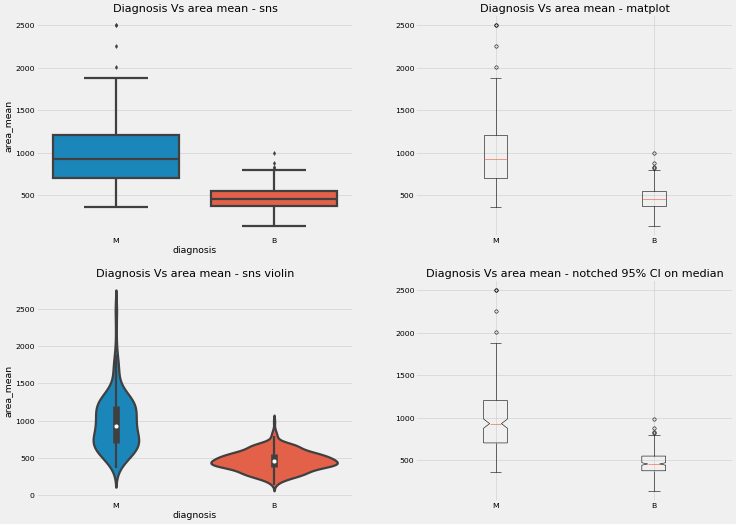

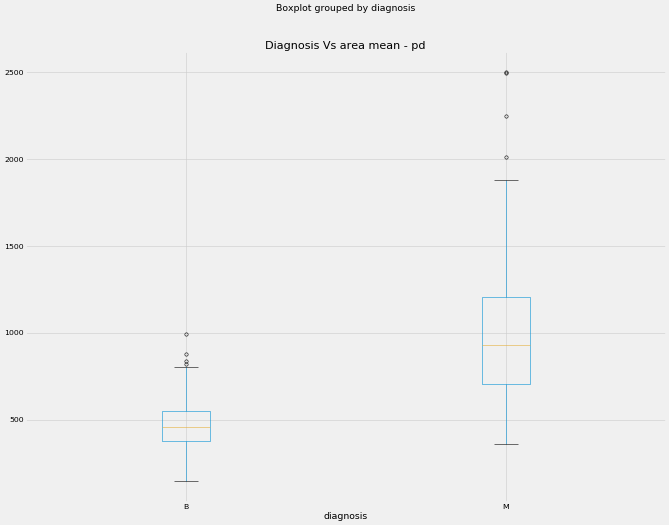

In [19]:
## Boxplot @ analyze relationship between a categorical feature and a continuous feature
##   - malignant/benign tumor diagnosis Vs area_mean

nr, nc = 2, 2

plt.subplot(nr, nc, 1)
sns.boxplot(x='diagnosis', y='area_mean', data=df)
plt.title('Diagnosis Vs area mean - sns');

plt.subplot(nr, nc, 2)
malig = df[ df.diagnosis == 'M'].area_mean
benig = df[ df.diagnosis == 'B'].area_mean
plt.boxplot([malig, benig], labels=['M', 'B'])
plt.title('Diagnosis Vs area mean - matplot');

plt.subplot(nr, nc, 3)
sns.violinplot(x='diagnosis', y='area_mean', data=df)
plt.title('Diagnosis Vs area mean - sns violin');


plt.subplot(nr, nc, 4)
plt.boxplot([malig, benig], labels=['M', 'B'], notch=True)
plt.title('Diagnosis Vs area mean - notched 95% CI on median');


# plt.subplot(nr, nc, 5)
df.boxplot(column='area_mean', by ='diagnosis')
plt.title('Diagnosis Vs area mean - pd');



**Construction:**
- Using `matplotlib.plt` or `seaborn` or `pandas df` directly. `plt` is more hectic
- `plt notch` to include confidence interval on medians. 

- The quartiles are calculated directly from the data; not estimate a normal distribution first


**Interpretation**
- Compare the range and distribution of the area_mean for malignant Vs benign diagnosis
    - average area size is smaller for benign
    - variability is greater for malignant
    - malignant has larger outliers 
- Confidence interval on medians
    - since the notches do not overlap then the true medians do differ
    


------ 38.  : IQR data using df.describe ------


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN



------ 39.  : IQR data using df.quantile ------


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0.01,8.621004e+04,8.45836,10.9304,53.8276,215.664,0.068654,0.033351,0.000000,0.000000,0.129508,...,15.2008,58.2704,256.192,0.087910,0.050094,0.00000,0.000000,0.176028,0.058580,NaN
0.25,8.692180e+05,11.70000,16.1700,75.1700,420.300,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.0800,84.1100,515.300,0.116600,0.147200,0.11450,0.064930,0.250400,0.071460,NaN
0.50,9.060240e+05,13.37000,18.8400,86.2400,551.100,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.4100,97.6600,686.500,0.131300,0.211900,0.22670,0.099930,0.282200,0.080040,NaN
0.75,8.813129e+06,15.78000,21.8000,104.1000,782.700,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.7200,125.4000,1084.000,0.146000,0.339100,0.38290,0.161400,0.317900,0.092080,NaN
0.99,9.010343e+08,24.37160,30.6520,165.7240,1786.600,0.132888,0.277192,0.351688,0.164208,0.259564,...,41.8024,208.3040,2918.160,0.188908,0.778644,0.90238,0.269216,0.486908,0.140628,NaN



------ 40.  : IQR Data using y plot data ------


[array([906024., 906024.]), array([13.37, 13.37]), array([18.84, 18.84])]

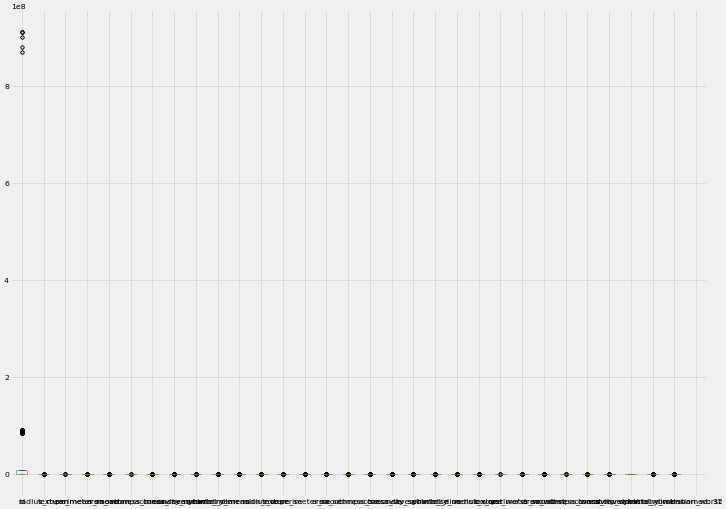

In [38]:
## Retrieving the statistical data in the boxplots
#     Option 1: use the y data from the plots
#     Option 2: df.quantile or df.describe

printHeadline("", 'IQR data using df.describe')
df.describe()

printHeadline("", 'IQR data using df.quantile')
df.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

# printHeadline("", 'Check min/max')
# df.max()

printHeadline("", 'IQR Data using y plot data')
# z, bp = df.boxplot(column='area_mean', by ='diagnosis')
_, bp = pd.DataFrame.boxplot(df, return_type='both')
outliers = [ f.get_ydata() for f in bp['fliers'] ]
boxes = [ b.get_ydata() for b in bp['boxes'] ] 
medians = [ m.get_ydata() for m in bp['medians'] ] 
whiskers = [ w.get_ydata() for w in bp['whiskers'] ]

medians[:3]
